In [1]:
import pandas as pd
import numpy as np
import re

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns

In [3]:
import python.dataset_analysis
from python.load import *
import json

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:740: FutureWarning: Possible nested set at position 8
  re.IGNORECASE | re.VERBOSE)
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:2044: FutureWarning: Possible nested set at position 152
  re.VERBOSE | re.IGNORECASE)
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


# Carga resultados 

In [4]:
squad_dev = pd.read_excel('datasets/squad/models/NER-POS-F-SQUAD-dev-queries.xlsx')

In [5]:
squad_dev.columns

Index(['title', 'id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'foco', 'query_ner', 'context_ner', 'answer_ner',
       'query_pos', 'answer_pos', 'plausible_pos', 'context_pos',
       'bert-large-uncased-whole-word-masking-finetuned-squad',
       'csarron/roberta-base-squad-v1', 'csarron/bert-base-uncased-squad-v1',
       'phiyodr/roberta-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'ozcangundes/T5-base-for-BioQA',
       'valhalla/t5-base-squad'],
      dtype='object')

In [59]:
print(len(squad_dev))

11873


### Utilidades

#### NER 

In [64]:
NER_TYPES = ['ORGANIZATION',  'PERSON',  
             'CITY',  'COUNTRY',  'LOCATION', 'NATIONALITY', 
             'DATE',  'DURATION',  'TIME',
             'PERCENT',  'NUMBER',  'ORDINAL',  'MONEY',
             'MISC',  'URL',  
             'CAUSE_OF_DEATH',  'STATE_OR_PROVINCE',  'CRIMINAL_CHARGE',  'RELIGION',  'TITLE',   'SET',  'IDEOLOGY' ]

count_types_ner_df = pd.DataFrame({'type': NER_TYPES}).set_index('type')

#### POSTagging

In [62]:
# TreeTagger - Penn TreeBank - https://courses.washington.edu/hypertxt/csar-v02/penntable.html

POS_TYPES = ['CC', 
             'CD',
             'JJ', 'JJR', 'JJS',
             'NN', 'NNS', 'NP', 'NPS',
             'MD',
             'PP', 'PP$', 
             'RB', 'RBR', 'RBS', 
             'VV', 'VVD', 'VVG', 'VVN', 'VVP', 'VVZ', 
             'WDT', 'WP', 'WRB']

            #'VB', 'VBD', 'VBG', 'VBN', 'VBZ', 'VBP', 
            #'VD', 'VDD', 'VDG', 'VDN', 'VDZ', 'VDP', 
            #'VH', 'VHD', 'VHG', 'VHN', 'VHZ', 'VHP', 
            # 'EX', 'FW', 'SYM', 'UH', 
            # ':', '$', 'SENT'
            # 'NP', 'NPS',
            # 'PDT', 'POS', 'RP', 'DT', 'IN', 'TO',

count_types_pos_df = pd.DataFrame({'type': POS_TYPES}).set_index('type')

### Análisis para pregunta, respuesta y contexto

In [125]:
COLUMN = 'answer_ner'
COLUMN = 'query_ner'
COLUMN = 'context_ner'

In [126]:
count_ner = []
for specific_ner in NER_TYPES:
    count_ner.append(sum(pd.Series(squad_dev[COLUMN].unique()).apply(lambda x: get_ner_count(load_data_ner(x), specific_ner))))

In [127]:
count_types_ner = pd.DataFrame({'type': NER_TYPES, COLUMN+'_count': count_ner}).set_index('type')
count_types_ner_df = pd.concat([count_types_ner_df, count_types_ner], axis=1)
count_types_ner_df.fillna(0,inplace=True)

In [128]:
count_types_ner_df

answer_ner_count  query_ner_count  context_ner_count
type                                                                   
ORGANIZATION                    258              890               1943
PERSON                          686             1150               1813
CITY                            144              550               1032
COUNTRY                         133              583               1123
LOCATION                        193              655               1498
NATIONALITY                     127              519               1143
DATE                            471              919               2143
DURATION                         51              437                324
TIME                              3                5                 22
PERCENT                           8                6                 26
NUMBER                          497              591               2352
ORDINAL                          37              232                370
MONEY                            44               18                 96
MISC                            130              514               1122
URL                               0                0                  0
CAUSE_OF_DEATH                   62              261                476
STATE_OR_PROVINCE                55              125                302
CRIMINAL_CHARGE                  10               22                 68
RELIGION                         42              165                300
TITLE                           135              565               1141
SET                              20               38                 84
IDEOLOGY                         33               81                245

In [129]:
count_types_ner_df.to_excel('datasets/squad/ner/squad-dev-ner-all-count.xlsx')

In [28]:
#COLUMN = 'answer_pos'
#COLUMN = 'query_pos'
COLUMN = 'context_pos'

In [29]:
count_pos = []
for specific_pos in POS_TYPES:
    count_pos.append(sum(pd.Series(squad_dev[COLUMN].unique()).apply(lambda x: get_pos_count(get_pos(x), specific_pos))))

In [30]:
count_types_pos = pd.DataFrame({'type': POS_TYPES, COLUMN+'_count': count_pos}).set_index('type')
count_types_pos_df = pd.concat([count_types_pos_df, count_types_pos], axis=1)
count_types_pos_df.fillna(0,inplace=True)

In [31]:
count_types_pos_df

answer_pos_count  query_pos_count  context_pos_count
type                                                      
CC                 646             1127               5706
CD                 977             1790               4289
JJ                2024             8623              14310
JJR                 88              388                641
JJS                 29              374                413
NN                3747            20245              25096
NNS               1711             7460              11469
NP                3467            10484              16138
NPS                 71              232                438
MD                  64              783                986
PP                  94              545               1562
PP$                  0                0                  0
RB                 343             2861               5236
RBR                 22              128                303
RBS                 11              148                168
VV                 254             2773               2417
VVD                110             3957               2685
VVG                237             1128               2422
VVN                328             3289               4638
VVP                 44             1978                931
VVZ                 48             1895               1386
WDT                 37              956               1093
WP                  10             8593                262
WRB                 13             2955                398

#### Gráficas NER

In [105]:
#fig = px.bar(count_types_ner_df.reset_index().sort_values('type'), x='type', y=["context_ner_count", "query_ner_count", "answer_ner_count"], title="Count of distinct NER in SQuAD dev 2.0")
#fig.show()

In [106]:
#fig = px.pie(count_types_ner_df.reset_index().sort_values('type'), names='type', values='context_ner_count',
#             title='Proportion of distinct NER in Contexts of SQuAD dev 2.0')
#fig.show()

In [110]:
#fig = px.pie(count_types_ner_df.reset_index().sort_values('type'), names='type', values='query_ner_count',
#             title='Proporción de entidades en las preguntas de SQuAD dev 2.0')
#fig.show()

In [111]:
fig = px.pie(count_types_ner_df.reset_index().sort_values('type'), names='type', values='answer_ner_count',
             title='Proporción de entidades en las respuestas de SQuAD dev 2.0')
fig.show()

#### Agregar entidades por tipo

In [33]:
#COLUMN = 'answer_ner'
#COLUMN = 'query_ner'
COLUMN = 'context_ner'

In [34]:
values_ner = []
for specific_ner in NER_TYPES:
    values_ner.append(sum(pd.Series(squad_dev[COLUMN].unique()).apply(lambda x: get_ner_values(load_data_ner(x), specific_ner)), []))

In [35]:
count_types_ner = pd.DataFrame({'type': NER_TYPES, COLUMN+'_values': values_ner}).set_index('type')
count_types_ner_df = pd.concat([count_types_ner_df, count_types_ner], axis=1)

In [134]:
count_types_ner_df.head()

answer_ner_count  query_ner_count  context_ner_count
type                                                              
ORGANIZATION               258              890               1943
PERSON                     686             1150               1813
CITY                       144              550               1032
COUNTRY                    133              583               1123
LOCATION                   193              655               1498

In [133]:
count_types_ner_df.to_excel('datasets//squad//ner//squad-dev-type_ner.xlsx')

#### Entidades frecuentes en pregunta, respuesta y contexto

In [37]:
from dataset_analysis import generate_word_cloud, preprocess_text

In [38]:
all_ner_values = count_types_ner_df['context_ner_values'] + count_types_ner_df['query_ner_values'] + count_types_ner_df['answer_ner_values']

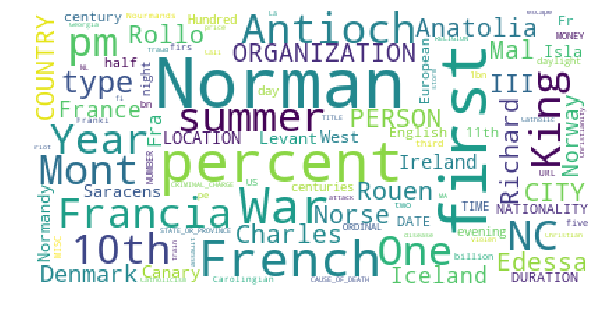

In [39]:
generate_word_cloud(str(all_ner_values), max_words=100)

In [40]:
pd.Series(count_types_ner_df['context_ner_values']['PERSON']).value_counts().head(10)

Norman         20
Kublai         16
Kublai Khan    14
Victoria       12
Newton         10
Watt            6
Huguenots       6
William         6
Rankine         6
Edward Said     5
dtype: int64

In [41]:
pd.Series(count_types_ner_df['query_ner_values']['PERSON']).value_counts().head(10)

Kublai          23
Huguenots       20
Iqbal           14
Victoria        12
Watt            10
Norman          10
Newton           8
Fermat           7
Maududi          6
John Paul II     6
dtype: int64

### Ver ejemplos

In [57]:
squad_dev.loc[squad_dev['answer'].str.contains('disease', na=False, case=False), ['id','query', 'answer']].values

array([['5725cbb289a1e219009abed4',
        'What was believed to be the cause of devastation to the civilization?',
        'diseases from Europe'],
       ['5726e3c4dd62a815002e9404',
        'What do the services given by pharmacists provide?',
        'optimizes the use of medication and promotes health, wellness, and disease prevention'],
       ['5728eff82ca10214002daadc',
        'The immune system protects organisms against what?', 'disease'],
       ['5729fa40af94a219006aa710',
        'Disruptions in sleep can lead to increase in what chronic conditions?',
        'heart disease, chronic pain, and asthma'],
       ['57309ef18ab72b1400f9c603',
        'Hobson argued that imperialism was an international what?',
        'disease']], dtype=object)

In [58]:
squad_dev.loc[squad_dev['context'].str.contains('Amazon', na=False, case=False), ['id','query', 'context','answer']].values

array([['5725b81b271a42140099d097',
        'Which name is also used to describe the Amazon rainforest in English?',
        'The Amazon rainforest (Portuguese: Floresta Amazônica or Amazônia; Spanish: Selva Amazónica, Amazonía or usually Amazonia; French: Forêt amazonienne; Dutch: Amazoneregenwoud), also known in English as Amazonia or the Amazon Jungle, is a moist broadleaf forest that covers most of the Amazon basin of South America. This basin encompasses 7,000,000 square kilometres (2,700,000 sq mi), of which 5,500,000 square kilometres (2,100,000 sq mi) are covered by the rainforest. This region includes territory belonging to nine nations. The majority of the forest is contained within Brazil, with 60% of the rainforest, followed by Peru with 13%, Colombia with 10%, and with minor amounts in Venezuela, Ecuador, Bolivia, Guyana, Suriname and French Guiana. States or departments in four nations contain "Amazonas" in their names. The Amazon represents over half of the planet\'s rem

In [42]:
squad_dev['query_pos_simple'] = squad_dev['query_pos'].apply(lambda x: ' '.join(get_pos(x)))
squad_dev['query_pos_simple'].value_counts()

WRB VBD DT NP NP VVD SENT                              14
WP VBD NP POS NN SENT                                  14
WP NN VBD NP NP SENT                                   11
WRB VVD NP NP NN SENT                                  10
WRB VBD DT NP NN VVD SENT                              10
                                                       ..
WP VBZ DT JJ NN NN IN NNS VVN RB SENT                   1
WP NP IN DT JJ NN NP VVZ DT NN IN DT NP POS NN SENT     1
WP VVP NN NNS VVP IN NNS VHP VBN VVN SENT               1
IN WP NN VBD JJ NP VVD SENT                             1
WP VVZ IN DT NN POS NN VBZ VVN SENT                     1
Name: query_pos_simple, Length: 10216, dtype: int64

In [48]:
squad_dev.loc[squad_dev['query_pos_simple'] == 'WRB VBD DT NP NP VVD SENT', ['id', 'query', 'answer', 'context']].head(1).values

array([['5725dd7d89a1e219009abfeb', 'When was the Tower Theatre built?',
        '1939',
        'The popular neighborhood known as the Tower District is centered around the historic Tower Theatre, which is included on the National List of Historic Places. The theater was built in 1939 and is at Olive and Wishon Avenues in the heart of the Tower District. (The name of the theater refers to a well-known landmark water tower, which is actually in another nearby area). The Tower District neighborhood is just north of downtown Fresno proper, and one-half mile south of Fresno City College. Although the neighborhood was known as a residential area prior, the early commercial establishments of the Tower District began with small shops and services that flocked to the area shortly after World War II. The character of small local businesses largely remains today. To some extent, the businesses of the Tower District were developed due to the proximity of the original Fresno Normal School, (later

In [50]:
#squad_dev.loc[squad_dev['id'] == '5725dd7d89a1e219009abfeb'].values

In [54]:
print(get_pos(str(squad_dev.loc[squad_dev['id'] == '5725dd7d89a1e219009abfeb', 'context_pos'].values)))

['DT', 'JJ', 'NN', 'VVN', 'IN', 'DT', 'NP', 'NP', 'VBZ', 'VVN', 'IN', 'DT', 'JJ', 'NP', 'NP', 'WDT', 'VBZ', 'VVN', 'IN', 'DT', 'NP', 'NP', 'IN', 'JJ', 'NNS', 'SENT', 'DT', 'NN', 'VBD', 'VVN', 'IN', 'CD', 'CC', 'VBZ', 'IN', 'NP', 'CC', 'NP', 'NNS', 'IN', 'DT', 'NN', 'IN', 'DT', 'NP', 'NP', 'SENT', 'DT', 'NN', 'IN', 'DT', 'NN', 'VVZ', 'TO', 'DT', 'JJ', 'NN', 'NN', 'NN', 'WDT', 'VBZ', 'RB', 'IN', 'DT', 'JJ', 'NN', 'SENT', 'DT', 'NP', 'NP', 'NN', 'VBZ', 'RB', 'RB', 'IN', 'JJ', 'NP', 'NN', 'CC', 'JJ', 'NN', 'NN', 'IN', 'NP', 'NP', 'NP', 'SENT', 'IN', 'DT', 'NN', 'VBD', 'VVN', 'IN', 'DT', 'JJ', 'NN', 'RB', 'DT', 'JJ', 'JJ', 'NNS', 'IN', 'DT', 'NP', 'NP', 'VVD', 'IN', 'JJ', 'NNS', 'CC', 'NNS', 'WDT', 'VVD', 'TO', 'DT', 'NN', 'RB', 'IN', 'NP', 'NP', 'NP', 'SENT', 'DT', 'NN', 'IN', 'JJ', 'JJ', 'NNS', 'RB', 'VVZ', 'NN', 'SENT', 'TO', 'DT', 'NN', 'DT', 'NNS', 'IN', 'DT', 'NP', 'NP', 'VBD', 'VVN', 'RB', 'TO', 'DT', 'NN', 'IN', 'DT', 'JJ', 'NP', 'JJ', 'NP', 'RBR', 'VVN', 'NP', 'NP', 'NP', 'IN', 'NP

### Análisis de trigramas comienzo pregunta

In [81]:
unigram_freq = squad_dev['query'].apply(lambda x: x.split(' ')[0].lower()).value_counts()

In [82]:
print(len(list(unigram_freq.index.values)))
unigram_freq.head(10)

544


what     5660
how      1110
who       926
when      676
in        510
where     407
          381
which     324
the       288
why       182
Name: query, dtype: int64

In [86]:
print(sum((100*unigram_freq / len(squad_dev))[11:])+3.208962)
print(sum((100*unigram_freq / len(squad_dev))[:11])-3.208962)
print(sum(unigram_freq[11:])-381)
print(sum(unigram_freq[:11])+381)
(100*unigram_freq / len(squad_dev)).head(10)

14.714057595047516
85.28594240495241
985
10888


what     47.671187
how       9.348943
who       7.799208
when      5.693590
in        4.295460
where     3.427946
          3.208962
which     2.728881
the       2.425672
why       1.532890
Name: query, dtype: float64

In [43]:
trigrams_freq = squad_dev['query'].apply(lambda x: ' '.join(x.split(' ')[0:3])).value_counts()

In [44]:
trigrams_freq.head(10)

What is the      666
What was the     243
What type of     221
In what year     199
When was the     146
What does the    132
What did the     111
When did the     108
What is a         90
What are the      90
Name: query, dtype: int64

In [45]:
cuatrigrams_freq = squad_dev['query'].apply(lambda x: ' '.join(x.split(' ')[0:4])).value_counts()

In [46]:
cuatrigrams_freq.head(10)

What is the name        128
In what year did        114
In what year was         72
What was the name        40
What is an example       31
What is the most         25
What is the term         24
What is the largest      18
What is one of           18
What is another term     17
Name: query, dtype: int64

#### Longitud textos con tokenización de POS tagging

In [76]:
squad_dev['len_query'] = squad_dev['query_pos'].apply(lambda x: len(get_pos(x)))
squad_dev['len_context'] = squad_dev['context_pos'].apply(lambda x: len(get_pos(x)))
squad_dev['len_answer'] = squad_dev['answer_pos'].apply(lambda x: len(get_pos(x)))

In [77]:
squad_dev[['len_query', 'len_context']].describe()

len_query   len_context
count  11873.000000  11873.000000
mean      11.058284    133.207361
std        3.485309     58.867277
min        3.000000     27.000000
25%        9.000000     97.000000
50%       11.000000    119.000000
75%       13.000000    153.000000
max       32.000000    646.000000

In [79]:
np.mean(squad_dev.loc[squad_dev['impossible']==False, 'len_answer'])

3.2860998650472335

#### Common POS tagging structures in questions

In [32]:
print(squad_dev['query_pos'].values[0])
get_pos(squad_dev['query_pos'].values[0])

[Tag(word='In', pos='IN', lemma='in'), Tag(word='what', pos='WP', lemma='what'), Tag(word='country', pos='NN', lemma='country'), Tag(word='is', pos='VBZ', lemma='be'), Tag(word='Normandy', pos='NP', lemma='Normandy'), Tag(word='located', pos='VVD', lemma='locate'), Tag(word='?', pos='SENT', lemma='?')]


['IN', 'WP', 'NN', 'VBZ', 'NP', 'VVD', 'SENT']

In [33]:
cuatrigrams_pos_freq = squad_dev['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:4])).value_counts()

In [34]:
# https://courses.washington.edu/hypertxt/csar-v02/penntable.html
cuatrigrams_pos_freq.head(10)

WP VBZ DT NN    520
WP VBZ DT JJ    251
WP NN IN NN     245
IN WP NN VVD    174
WP VBD DT NN    170
WP VVD DT NN    144
IN WP NN VBD    124
WP VBD DT JJ    119
WP VVZ DT NN    113
WP VVD DT NP    112
Name: query_pos, dtype: int64

In [35]:
trigrams_pos_freq = squad_dev['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3])).value_counts()
trigrams_pos_freq.head(10) 

WP VBZ DT     925
WP NN IN      515
IN WP NN      440
WP VVD DT     401
WP VBD DT     383
WRB JJ NNS    356
WP VVD NP     286
WP VVZ DT     258
WRB VBD DT    254
WRB VVD NP    248
Name: query_pos, dtype: int64

In [100]:
squad_dev['query_trigrams'] = squad_dev['query'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
squad_dev['query_trigrams_pos'] = squad_dev['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3]))

In [102]:
unigram_freq = squad_dev['query_trigrams_pos'].value_counts()
unigram_list = ['WP VBZ DT', 'WDT IN DT', 'WP VBD DT', 'WP NN IN', 'WP VVD DT', 'IN WP NN', 'WP VVD NP', 'VVG TO DT', 'WRB JJ NNS', 'IN DT NN', 'PP MD VV', 'WP MD PP', 'WP NN VVD', 'WP VBD VVN', 'WP VVZ DT', 'WP VBZ NP', 'WRB VVD NP', 'WP VVZ NP', 'WRB VBD DT', 'DT NN VVZ', 'DT JJ NN', 'DT NN VBZ', 'DT NN IN']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    try:
        unigram_num += unigram_freq[element]
        print(element, str(round(unigram_freq[element]/len(squad_dev),4)), str(unigram_freq[element]))
    except:
        print(element, 0)
print('\nOTHER')
print(len(squad_dev) - unigram_num)
print((len(squad_dev) - unigram_num)/len(squad_dev))

WP VBZ DT 0.0779 925
WDT IN DT 0.0002 2
WP VBD DT 0.0323 383
WP NN IN 0.0434 515
WP VVD DT 0.0338 401
IN WP NN 0.0371 440
WP VVD NP 0.0241 286
VVG TO DT 0.0008 10
WRB JJ NNS 0.03 356
IN DT NN 0.0032 38
PP MD VV 0
WP MD PP 0.0003 4
WP NN VVD 0.0201 239
WP VBD VVN 0.0071 84
WP VVZ DT 0.0217 258
WP VBZ NP 0.0051 61
WRB VVD NP 0.0209 248
WP VVZ NP 0.0052 62
WRB VBD DT 0.0214 254
DT NN VVZ 0.0003 3
DT JJ NN 0.0046 55
DT NN VBZ 0.0002 2
DT NN IN 0.006 71

OTHER
7176
0.604396529941885


In [37]:
squad_dev['query_cuatrigrams'] = squad_dev['query'].apply(lambda x: ' '.join(x.split(' ')[0:4]))
squad_dev['query_cuatrigrams_pos'] = squad_dev['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:4]))

In [157]:
squad_dev['query_cuatrigrams_pos'].value_counts()

WP VBZ DT NN     519
WP VBZ DT JJ     251
WP NN IN NN      245
IN WP NN VVD     174
WP VBD DT NN     170
                ... 
WP VVD RB RB       1
WRB RB VH NNS      1
WP RB VVD JJ       1
NP VBZ VVN TO      1
WP VBZ JJR JJ      1
Name: query_cuatrigrams_pos, Length: 2613, dtype: int64

In [159]:
squad_dev['query_all_pos'] = squad_dev['query_pos'].apply(lambda x: ' '.join(get_pos(x)))
squad_dev['query_all_pos'].value_counts()

WP VBD NP POS NN SENT                                 14
WRB VBD DT NP NP VVD SENT                             14
WP NN VBD NP NP SENT                                  11
WRB VVD NP NP NN SENT                                 10
WRB VBD DT NP NN VVD SENT                             10
                                                      ..
WP VBD VVN IN NP SENT                                  1
DT VVN NN NN IN NN VBZ VVN IN DT WP VVP IN NN SENT     1
WRB VVD NP VV DT JJS NP NN NN SENT                     1
DT NNS NP  NN  NP  CC NP VBP VVN IN WP SENT            1
WP RB VVP DT NNS VVP JJ NN IN DT JJ NN SENT            1
Name: query_all_pos, Length: 10222, dtype: int64

In [161]:
#squad_train.loc[squad_train['query_all_pos'] == 'WP VVZ NP VV IN SENT', 'query']
#squad_dev.loc[squad_dev['query_all_pos'] == 'WP VBD NP POS NN SENT', 'query']

In [162]:
unigram_freq = squad_dev['query_all_pos'].value_counts()
unigram_list = ['WP VVZ NP VV IN SENT', 'WP VBD NP POS NN SENT', 'WP VVD DT NN SENT', 'WP VBZ NP NP SENT', 'WP VBZ DT JJS NN IN DT NN SENT']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(squad_dev),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(squad_dev) - unigram_num)
print((len(squad_dev) - unigram_num)/len(squad_dev))

WP VVZ NP VV IN SENT 0.0003 4
WP VBD NP POS NN SENT 0.0012 14
WP VVD DT NN SENT 0.0007 8
WP VBZ NP NP SENT 0.0002 2
WP VBZ DT JJS NN IN DT NN SENT 0.0001 1

OTHER
11844
0.9975574833656194


In [39]:
#squad_dev.loc[squad_dev['query_cuatrigrams_pos'] == 'WRB VBD DT NP']

In [112]:
def pral_pos(pos_str):
    if 'NP' in pos_str:
        return 'NP'
    if 'JJ' in pos_str:
        return 'JJ'
    if 'V' in pos_str:
        return 'V'
    if 'R' in pos_str:
        return 'R'
    if 'CD' in pos_str:
        return 'CD'
    if 'NN' in pos_str:
        return 'NN'    
    return ''

In [114]:
squad_dev['answer_red_pos'] = squad_dev['answer_pos'].apply(lambda x: ' '.join(get_pos(x)))
squad_dev['answer_pral_pos'] = squad_dev['answer_red_pos'].apply(lambda x: pral_pos(x))
squad_dev['answer_pral_pos'].value_counts()

      6354
NP    2060
JJ    1463
NN    1135
CD     440
V      339
R       82
Name: answer_pral_pos, dtype: int64

In [116]:
unigram_freq = squad_dev['answer_pral_pos'].value_counts()
unigram_list = ['NP','NN','JJ', 'CD','V','R']
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(squad_dev),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(squad_dev) - unigram_num)
print((len(squad_dev) - unigram_num)/len(squad_dev))

NP 0.1735 2060
NN 0.0956 1135
JJ 0.1232 1463
CD 0.0371 440
V 0.0286 339
R 0.0069 82

OTHER
6354
0.5351638170639266


### Obtener foco de la pregunta

Primer sustantivo de la pregunta, o en caso de partícula Wh, es automático. Where -> place, Who -> person. No tiene por qué aparecer en el texto explícito. 

WDT	wh-determiner	which;
WP	wh-pronoun	who, what;
WP$	possessive wh-pronoun	whose;
WRB	wh-abverb	where, when

In [5]:
print(get_word_pos(squad_dev['query_pos'][0]))
print(get_pos(squad_dev['query_pos'][0]))
obtener_foco(get_word_pos(squad_dev['query_pos'][0]), get_pos(squad_dev['query_pos'][0]))

['In', 'what', 'country', 'is', 'Normandy', 'located', '']
['IN', 'WP', 'NN', 'VBZ', 'NP', 'VVD', 'SENT']


'country'

In [6]:
squad_dev['foco'] = squad_dev.apply(lambda x: obtener_foco(get_word_pos(x['query_pos']), get_pos(x['query_pos'])), axis=1)

In [7]:
squad_dev['foco'].value_counts().head(30)

person          1005
time             775
place            434
year             292
type             265
name             224
kind              99
people            83
country           80
percentage        78
term              76
city              69
types             52
example           50
Rhine             43
force             42
century           39
number            37
Warsaw            37
group             37
oxygen            36
Huguenots         36
system            34
organization      34
area              34
form              32
Whose             31
process           31
schools           31
theory            30
Name: foco, dtype: int64

In [93]:
#fig = px.histogram(squad_dev, x="foco").update_xaxes(categoryorder="total descending")
#fig.show()

In [8]:
unigram_freq = squad_dev['foco'].value_counts()

In [9]:
unigram_list = ['person','number', 'time','place','year','name','type', 'people', 'country', 'percentage', 'kind', 'age'] 
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(squad_dev),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(squad_dev) - unigram_num)
print((len(squad_dev) - unigram_num)/len(squad_dev))

person 0.0846 1005
number 0.0031 37
time 0.0653 775
place 0.0366 434
year 0.0246 292
name 0.0189 224
type 0.0223 265
people 0.007 83
country 0.0067 80
percentage 0.0066 78
kind 0.0083 99
age 0.0008 10

OTHER
8491
0.7151520256043123


In [10]:
print(list(squad_dev['foco'].unique()))

['country', 'time', 'countries', 'person', 'century', 'religion', 'meaning', 'river', 'Norman', 'part', 'name', 'origins', 'men', 'place', 'base', 'Ethelred', 'language', 'year', 'culture', 'conquest', 'Western', 'Richard', 'Isaac', 'continent', 'customaries', 'kind', 'architecture', 'type', 'monastery', 'tradition', 'branch', 'attribute', 'term', 'measure', 'method', 'resources', 'unit', 'role', 'fields', 'field', 'complexity', 'problem', 'kilometers', 'example', 'objects', 'way', 'word', 'integer', 'output', 'answer', 'decision', 'function', 'outputs', 'salesman', 'addition', 'problems', 'integers', 'measurement', 'variable', 'Complexity', 'Whose', 'input', 'T', 'a', 'model', 'Turing', 'iteration', 'factors', 'determination', 'commonality', 'analysis', 'resource', 'expression', 'Time', 'Communication', 'Decision', 'expressions', 'Case', 'solution', 'Classification', 'bound', 'algorithm', 'phrase', 'O', 'Big', 'definitions', 'Difficulty', 'computation', 'thesis', 'examples', 'AC', 'BQ

In [11]:
squad_dev.head()

title                        id  \
0  Normans  56ddde6b9a695914005b9628   
1  Normans  56ddde6b9a695914005b9629   
2  Normans  56ddde6b9a695914005b962a   
3  Normans  56ddde6b9a695914005b962b   
4  Normans  56ddde6b9a695914005b962c   

                                               query  \
0               In what country is Normandy located?   
1                 When were the Normans in Normandy?   
2      From which countries did the Norse originate?   
3                          Who was the Norse leader?   
4  What century did the Normans first gain their ...   

                        answer  impossible plausible dataset  \
0                       France       False       NaN     dev   
1      10th and 11th centuries       False       NaN     dev   
2  Denmark, Iceland and Norway       False       NaN     dev   
3                        Rollo       False       NaN     dev   
4                 10th century       False       NaN     dev   

                                             context       foco  \
0  The Normans (Norman: Nourmands; French: Norman...    country   
1  The Normans (Norman: Nourmands; French: Norman...       time   
2  The Normans (Norman: Nourmands; French: Norman...  countries   
3  The Normans (Norman: Nourmands; French: Norman...     person   
4  The Normans (Norman: Nourmands; French: Norman...    century   

                                         query_ner  ...  \
0                       {'LOCATION': ['Normandy']}  ...   
1                       {'LOCATION': ['Normandy']}  ...   
2                                               {}  ...   
3         {'MISC': ['Norse'], 'TITLE': ['leader']}  ...   
4  {'DURATION': ['century'], 'ORDINAL': ['first']}  ...   

          query_cuatrigrams query_cuatrigrams_pos  \
0        In what country is          IN WP NN VBZ   
1     When were the Normans        WRB VBD DT NPS   
2  From which countries did        IN WDT NNS VVD   
3         Who was the Norse          WP VBD DT JJ   
4      What century did the          WP NN VVD DT   

                    query_pos_simple len_query len_context len_answer  \
0           IN WP NN VBZ NP VVD SENT         7         114          1   
1          WRB VBD DT NPS IN NP SENT         7         114          4   
2       IN WDT NNS VVD DT NN VV SENT         8         114          4   
3               WP VBD DT JJ NN SENT         6         114          1   
4  WP NN VVD DT NPS RB VV JJ NN SENT        10         114          2   

         query_trigrams query_trigrams_pos answer_red_pos answer_pral_pos  
0       In what country           IN WP NN             NP              NP  
1         When were the         WRB VBD DT   JJ CC JJ NNS              JJ  
2  From which countries         IN WDT NNS    NP NP CC NP              NP  
3           Who was the          WP VBD DT             NP              NP  
4      What century did          WP NN VVD          JJ NN              JJ  

[5 rows x 35 columns]

In [117]:
squad_dev.columns

Index(['title', 'id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'foco', 'query_ner', 'context_ner', 'answer_ner',
       'query_pos', 'answer_pos', 'plausible_pos', 'context_pos',
       'bert-large-uncased-whole-word-masking-finetuned-squad',
       'csarron/roberta-base-squad-v1', 'csarron/bert-base-uncased-squad-v1',
       'phiyodr/roberta-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/bert-base-finetuned-squad2',
       'phiyodr/bert-large-finetuned-squad2', 'ozcangundes/T5-base-for-BioQA',
       'valhalla/t5-base-squad', 'query_cuatrigrams', 'query_cuatrigrams_pos',
       'query_pos_simple', 'len_query', 'len_context', 'len_answer',
       'query_trigrams', 'query_trigrams_pos', 'answer_red_pos',
       'answer_pral_pos'],
      dtype='object')

##### Validacion tipo foco y entidad respuesta

In [13]:
squad_dev['answer_ner_tags'] = squad_dev['answer_ner'].apply(lambda x: str(get_ner_tags(load_data(x))))

In [171]:
squad_dev['answer_ner_tags_processed'] = squad_dev['answer_ner_tags'].apply(lambda x: len([x for x in str(x).replace('"','').replace("'",'').split(', ') if x and x!='[]']))

In [172]:
def marca_multiple_ninguna_ner(tipo_ner, number_ner, impossible):
    if impossible:
        return 'NO RESP'
    if number_ner == 0:
        return 'SIN NER'
    if number_ner == 1:
        return str(tipo_ner).replace('[','').replace(']','').replace("'",'')
    else:
        return 'MULTI'

In [173]:
squad_dev['answer_ner_tags_processed'] = squad_dev[['answer_ner_tags', 'answer_ner_tags_processed', 'impossible']].apply(lambda x: marca_multiple_ninguna_ner(x[0], x[1], x[2]), axis=1)

In [174]:
print(squad_dev['answer_ner_tags_processed'].value_counts())
print(100*squad_dev['answer_ner_tags_processed'].value_counts() / len(squad_dev))

NO RESP              5945
SIN NER              2724
PERSON                668
NUMBER                574
DATE                  491
MULTI                 414
ORGANIZATION          214
COUNTRY               117
LOCATION              103
CITY                   91
NATIONALITY            80
TITLE                  78
MISC                   71
IDEOLOGY               48
RELIGION               42
MONEY                  41
CAUSE_OF_DEATH         41
DURATION               37
ORDINAL                35
SET                    22
STATE_OR_PROVINCE      15
CRIMINAL_CHARGE        15
PERCENT                 4
TIME                    3
Name: answer_ner_tags_processed, dtype: int64
NO RESP              50.071591
SIN NER              22.942811
PERSON                5.626211
NUMBER                4.834498
DATE                  4.135433
MULTI                 3.486903
ORGANIZATION          1.802409
COUNTRY               0.985429
LOCATION              0.867515
CITY                  0.766445
NATIONALITY         

In [175]:
def get_ner_count(ner_dict, specific_ner):
    if ner_dict and specific_ner in ner_dict.keys():
        return len(ner_dict[specific_ner])
    return 0

def entidades_posibles_contexto(tipo_ner, context_ner):
    return get_ner_count(load_data(context_ner), tipo_ner)

In [176]:
squad_dev['context_ner_tags_answer'] = squad_dev[['answer_ner_tags_processed', 'context_ner']].apply(lambda x: entidades_posibles_contexto(x[0], x[1]), axis=1)

In [177]:
squad_dev[['answer_ner_tags_processed', 'context_ner_tags_answer']].groupby(['answer_ner_tags_processed']).mean()

context_ner_tags_answer
answer_ner_tags_processed                         
CAUSE_OF_DEATH                            3.658537
CITY                                      3.483516
COUNTRY                                   3.581197
CRIMINAL_CHARGE                           2.266667
DATE                                      4.006110
DURATION                                  1.567568
IDEOLOGY                                  3.250000
LOCATION                                  4.097087
MISC                                      2.661972
MONEY                                     3.390244
MULTI                                     0.000000
NATIONALITY                               2.875000
NO RESP                                   0.000000
NUMBER                                    6.162021
ORDINAL                                   1.714286
ORGANIZATION                              5.490654
PERCENT                                   2.250000
PERSON                                    3.976048
RELIGION                                  3.023810
SET                                       0.363636
SIN NER                                   0.000000
STATE_OR_PROVINCE                         2.800000
TIME                                      1.333333
TITLE                                     2.987179

In [14]:
print(sum(squad_dev.loc[squad_dev['foco'] == 'person', 'answer_ner_tags'].value_counts()))
squad_dev.loc[squad_dev['foco'] == 'person', 'answer_ner_tags'].value_counts()

1005


[]                                        628
['PERSON']                                242
['ORGANIZATION']                           27
['TITLE', 'PERSON']                        16
['TITLE']                                  15
['NATIONALITY']                            12
['COUNTRY']                                 7
['MISC']                                    7
['CITY']                                    6
['NUMBER']                                  4
['NATIONALITY', 'IDEOLOGY']                 2
['PERSON', 'TITLE']                         2
['NATIONALITY', 'TITLE', 'PERSON']          2
['IDEOLOGY']                                2
['LOCATION']                                2
['TITLE', 'LOCATION']                       2
['PERSON', 'ORGANIZATION']                  2
['RELIGION', 'PERSON']                      2
['PERSON', 'LOCATION']                      2
['RELIGION', 'MISC']                        1
['STATE_OR_PROVINCE']                       1
['LOCATION', 'CITY']              

In [48]:
squad_dev['query_ner_tags'] = squad_dev['query_ner'].apply(lambda x: str(sorted(load_data(x).keys())))
squad_dev['answer_ner_tags'] = squad_dev['answer_ner'].apply(lambda x: str(sorted(load_data(x).keys())))

In [49]:
squad_dev['answer'] = squad_dev['answer'].fillna('')
squad_dev['validation_foco_ner'] = squad_dev[['foco', 'answer_ner_tags', 'answer']].apply(lambda x: validate_foco_ner(x.foco, x.answer_ner_tags, x.answer), axis=1)

In [50]:
squad_dev.loc[squad_dev['answer_ner_tags'].isna(), 'validation_foco_ner'] = 'NA'
squad_dev.loc[squad_dev['answer_ner_tags']=='[]', 'validation_foco_ner'] = 'NA'

In [51]:
unigram_list = ['OK-PERSON', 'OK-ORGANIZATION', 'OK-PERSON-ORG',
                'OK-TITLE', 'OK-NATIONALITY', 'OK-RELIGION', #'OK-IDEOLOGY',
                'OK-LOC','OK-COUNTRY','OK-LOCATION', 'OK-CITY',
                'OK-DATE', 'OK-TIME', #'OK-DURATION',
                'OK-NUMBER','OK-PERCENT', #'OK-MONEY', 
                #'OK-URL', #'OK-MISC',
                'KO', 'NA']

unigram_freq = squad_dev['validation_foco_ner'].value_counts()
unigram_per = 0
unigram_num = 0
for element in unigram_list:
    unigram_num += unigram_freq[element]
    print(element, str(round(unigram_freq[element]/len(squad_dev),4)), str(unigram_freq[element]))
print('\nOTHER')
print(len(squad_dev) - unigram_num)
print((len(squad_dev) - unigram_num)/len(squad_dev))

OK-PERSON 0.0229 272
OK-ORGANIZATION 0.0008 10
OK-PERSON-ORG 0.022 261
OK-TITLE 0.0001 1
OK-NATIONALITY 0.0004 5
OK-RELIGION 0.0008 9
OK-LOC 0.0132 157
OK-COUNTRY 0.0028 33
OK-LOCATION 0.0002 2
OK-CITY 0.0019 22
OK-DATE 0.0004 5
OK-TIME 0.0382 453
OK-NUMBER 0.0248 295
OK-PERCENT 0.0001 1
KO 0.1413 1678
NA 0.7301 8669

OTHER
0
0.0


In [364]:
#squad_dev.to_excel('NER-POS-F-SQUAD-dev-queries.xlsx', index=False)
squad_dev.to_excel('datasets/squad/models/NER-POS-F-SQUAD-dev-queries.xlsx', index=False)

### Results of models

In [30]:
squad_dev = pd.read_excel('BERT-NER-POS-F-SQUAD-ftunSQUAD-ftunNEWSQA-dev-queries.xlsx')

In [182]:
squad_dev.columns

Index(['title', 'id', 'query', 'answer', 'impossible', 'plausible', 'dataset',
       'context', 'foco', 'query_ner', 'context_ner', 'answer_ner',
       'query_pos', 'answer_pos', 'plausible_pos', 'context_pos',
       'csarron/bert-base-uncased-squad-v1',
       'phiyodr/bert-base-finetuned-squad2', 'csarron/roberta-base-squad-v1',
       'phiyodr/bert-large-finetuned-squad2', 'deepset/roberta-base-squad2',
       'phiyodr/roberta-large-finetuned-squad2', 'valhalla/t5-base-squad',
       'tli8hf/unqover-bert-base-uncased-newsqa',
       'tli8hf/unqover-bert-large-uncased-newsqa',
       'tli8hf/unqover-roberta-base-newsqa',
       'tli8hf/unqover-roberta-large-newsqa', 'query_cuatrigrams',
       'query_cuatrigrams_pos', 'answer_red_pos', 'answer_pral_pos',
       'len_query', 'len_context', 'len_answer',
       'phiyodr/bert-base-finetuned-squad2_json', 'query_trigrams',
       'query_trigrams_pos', 'query_ner_tags', 'answer_ner_tags',
       'validation_foco_ner', 'phiyodr/bert-lar

In [178]:
squad_dev['query_unigrams'] = squad_dev['query'].apply(lambda x: x.split(' ')[0])
squad_dev['query_unigrams_pos'] = squad_dev['query_pos'].apply(lambda x: get_pos(x)[0])

squad_dev['query_trigrams'] = squad_dev['query'].apply(lambda x: ' '.join(x.split(' ')[0:3]))
squad_dev['query_trigrams_pos'] = squad_dev['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:3]))
squad_dev['query_cuatrigrams'] = squad_dev['query'].apply(lambda x: ' '.join(x.split(' ')[0:4]))
squad_dev['query_cuatrigrams_pos'] = squad_dev['query_pos'].apply(lambda x: ' '.join(get_pos(x)[0:4]))

squad_dev['answer_red_pos'] = squad_dev['answer_pos'].apply(lambda x: ' '.join(get_pos(x)))
squad_dev['answer_pral_pos'] = squad_dev['answer_red_pos'].apply(lambda x: pral_pos(x))
squad_dev['answer_ner_tags'] = squad_dev['answer_ner'].apply(lambda x: str(get_ner_tags(load_data(x))))


squad_dev['len_query'] = squad_dev['query_pos'].apply(lambda x: len(get_pos(x)))
squad_dev['len_context'] = squad_dev['context_pos'].apply(lambda x: len(get_pos(x)))
squad_dev['len_answer'] = squad_dev['answer_pos'].apply(lambda x: len(get_pos(x)))

squad_dev['foco'] = squad_dev.apply(lambda x: obtener_foco(get_word_pos(x['query_pos']), get_pos(x['query_pos'])), axis=1)

In [179]:
MODELS = [
            'phiyodr/bert-base-finetuned-squad2', 'phiyodr/bert-large-finetuned-squad2',
            'deepset/roberta-base-squad2','phiyodr/roberta-large-finetuned-squad2',
            'valhalla/t5-base-squad'
        ]

In [183]:
new_df = squad_dev[['id', 'query', 'answer', 'impossible', 'plausible', 'dataset', 'context',
                    'query_ner','answer_ner','answer_ner_tags','query_pos','answer_pos','foco',# 'foco_norm',
                      'query_unigrams', 'query_unigrams_pos',
                    'query_trigrams_pos', 'query_trigrams', 'query_cuatrigrams_pos', 'query_cuatrigrams',
                    'answer_red_pos', 'answer_pral_pos', 'validation_foco_ner', 'len_query', 'len_context', 'len_answer',
                      'context_ner']+MODELS].copy()

In [185]:
new_df = new_df.loc[new_df['impossible'] == False].copy()

#### Obtencion de preguntas contestadas erroneamente

In [208]:
model = MODELS[4]
model

'valhalla/t5-base-squad'

In [204]:
# error loading data
new_df[model+'_json'] = new_df[model].apply(lambda x: load_answer_data(str(x)))

In [209]:
#new_df['score_'+model] = new_df[model+'_json'].apply(lambda x: round(float(x['score']),5) if 'score' in x.keys() else 0.0)
#new_df['answer_model_'+model] = new_df[model+'_json'].apply(lambda x: x['answer'] if 'answer' in x.keys() else '')
# T5
#new_df['answer_model_'+model] = new_df[model].apply(lambda x: x)

In [210]:
new_df['correct_'+model] = new_df[['answer', 'answer_model_'+model, 'plausible']].apply(lambda x: 
                                            correct(x['answer'], x['answer_model_'+model], x['plausible']), axis=1)

In [211]:
new_df['correct_'+model].value_counts()

True     5245
False     683
Name: correct_valhalla/t5-base-squad, dtype: int64

In [244]:
print(new_df.loc[new_df['impossible']==False, 'correct_'+MODELS[4]].value_counts())
print(100*new_df.loc[new_df['impossible']==False, 'correct_'+MODELS[4]].value_counts() / len(new_df.loc[new_df['impossible']==False]))

True     5245
False     683
Name: correct_valhalla/t5-base-squad, dtype: int64
True     88.478408
False    11.521592
Name: correct_valhalla/t5-base-squad, dtype: float64


In [325]:
COLUMNS_PIVOTS = ['correct_phiyodr/bert-base-finetuned-squad2',
    'correct_phiyodr/bert-large-finetuned-squad2',
    'correct_deepset/roberta-base-squad2',                
    'correct_phiyodr/roberta-large-finetuned-squad2',                
    'correct_valhalla/t5-base-squad']
prev_pivot = new_df[['id']+COLUMNS_PIVOTS].groupby(COLUMNS_PIVOTS).count()

In [326]:
prev_pivot = prev_pivot.reset_index()
prev_pivot['porc']= 100*prev_pivot['id'] / len(new_df)
prev_pivot.to_excel('analysis//error_common_squad_dev.xlsx', index=False)

In [260]:
new_df['error_by'] = ''
new_df['correct_by'] = ''

In [261]:
new_df.loc[(new_df['correct_phiyodr/bert-base-finetuned-squad2'] == False) |
            (new_df['correct_phiyodr/bert-large-finetuned-squad2'] == False), 'error_by' ] = 'BERT'
new_df.loc[(new_df['correct_phiyodr/bert-base-finetuned-squad2'] == True) &
            (new_df['correct_phiyodr/bert-large-finetuned-squad2'] == True), 'correct_by' ] = 'BERT'

In [262]:
new_df.loc[(new_df['correct_deepset/roberta-base-squad2'] == False) |
            (new_df['correct_phiyodr/roberta-large-finetuned-squad2'] == False), 'error_by' ] += ', RoBERTa'
new_df.loc[(new_df['correct_deepset/roberta-base-squad2'] == True) &
            (new_df['correct_phiyodr/roberta-large-finetuned-squad2'] == True), 'correct_by' ] += ', RoBERTa'

In [263]:
new_df.loc[(new_df['correct_valhalla/t5-base-squad'] == False), 'error_by' ] += ', T5'
new_df.loc[(new_df['correct_valhalla/t5-base-squad'] == True), 'correct_by' ] += ', T5'

In [264]:
new_df.loc[new_df['error_by'] == ', RoBERTa', 'error_by'] = 'RoBERTa'
new_df.loc[new_df['error_by'] == ', T5', 'error_by'] = 'T5'
new_df.loc[new_df['error_by'] == ', RoBERTa, T5', 'error_by'] = 'RoBERTa, T5'
new_df.loc[new_df['correct_by'] == ', RoBERTa', 'correct_by'] = 'RoBERTa'
new_df.loc[new_df['correct_by'] == ', T5', 'correct_by'] = 'T5'
new_df.loc[new_df['correct_by'] == ', RoBERTa, T5', 'correct_by'] = 'RoBERTa, T5'

In [266]:
new_df['error_by'].value_counts()

                     4538
BERT, RoBERTa, T5     342
BERT                  273
RoBERTa               244
T5                    191
BERT, RoBERTa         190
BERT, T5               90
RoBERTa, T5            60
Name: error_by, dtype: int64

In [267]:
new_df['correct_by'].value_counts()

BERT, RoBERTa, T5    4538
                      342
RoBERTa, T5           273
BERT, T5              244
BERT, RoBERTa         191
T5                    190
RoBERTa                90
BERT                   60
Name: correct_by, dtype: int64

In [268]:
new_df.loc[new_df['error_by'] != '', 'correct'] = False

In [269]:
new_df['models_answers'] = new_df['error_by']

In [270]:
error_models = new_df.loc[new_df['error_by'] != '', ['id', 'models_answers', 'correct']].copy()

In [271]:
new_df['models_answers'] = new_df['correct_by']
new_df['correct'] = True
#new_df.loc[new_df['models_answers'] == '', 'correct'] = False
#new_df.loc[new_df['models_answers'] == '', 'models_answers'] = 'BERT, RoBERTa, T5'

In [272]:
error_models = pd.concat([error_models, new_df.loc[new_df['models_answers'] != '', ['id', 'models_answers', 'correct']].copy()])

In [273]:
error_models.groupby(['correct','models_answers']).count()

id
correct models_answers         
False   BERT                273
        BERT, RoBERTa       190
        BERT, RoBERTa, T5   342
        BERT, T5             90
        RoBERTa             244
        RoBERTa, T5          60
        T5                  191
True    BERT                 60
        BERT, RoBERTa       191
        BERT, RoBERTa, T5  4538
        BERT, T5            244
        RoBERTa              90
        RoBERTa, T5         273
        T5                  190

In [274]:
100*error_models.groupby(['correct','models_answers']).count() / len(squad_dev.loc[squad_dev['impossible']==False])

id
correct models_answers              
False   BERT                4.605263
        BERT, RoBERTa       3.205128
        BERT, RoBERTa, T5   5.769231
        BERT, T5            1.518219
        RoBERTa             4.116059
        RoBERTa, T5         1.012146
        T5                  3.221997
True    BERT                1.012146
        BERT, RoBERTa       3.221997
        BERT, RoBERTa, T5  76.551957
        BERT, T5            4.116059
        RoBERTa             1.518219
        RoBERTa, T5         4.605263
        T5                  3.205128

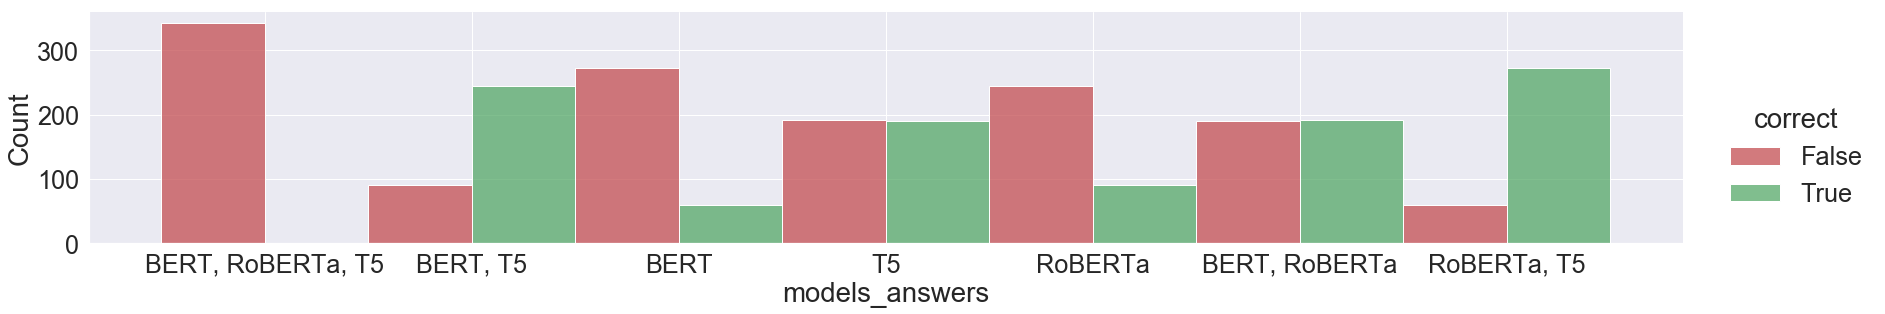

In [280]:
sns.displot(error_models.loc[~((error_models['correct']==True)&(error_models['models_answers']=='BERT, RoBERTa, T5'))], 
            aspect=60/12.27, x="models_answers", hue="correct",
            kind="hist", multiple="dodge", palette=['r','g'], hue_order=[False, True])

In [281]:
new_df['correct'] = True
new_df.loc[new_df['error_by'] != '', 'correct'] = False

In [282]:
new_df['correct'].value_counts()

True     4538
False    1390
Name: correct, dtype: int64

#### Error patterns with focus and NER association

Text(0.5, 1.0, 'Error valhalla/t5-base-squad')

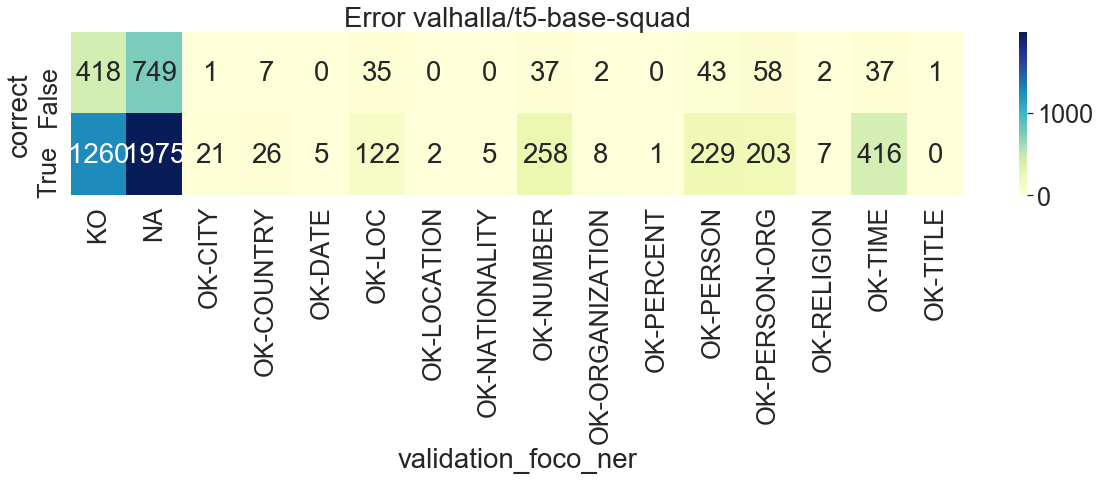

In [288]:
COLUMN_PIVOT = 'validation_foco_ner'
new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
new_pivot = new_df[['id','correct', COLUMN_PIVOT]].groupby(['correct', COLUMN_PIVOT]).count().reset_index().pivot(index='correct', columns=COLUMN_PIVOT, values='id')
new_pivot = new_pivot.fillna(0.0)
new_pivot = new_pivot.astype(int)

plt.figure(figsize=(20,3))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt="d")
# annot=annot_pivot(new_pivot)
sns_heatmap.set_title("Error " + model)

#### Error patterns with POSTagging

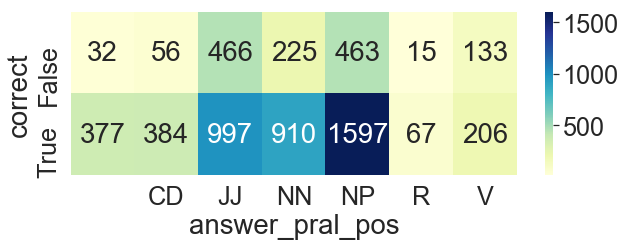

In [295]:
COLUMN_PIVOT = 'answer_pral_pos'
new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
new_pivot = new_df[['id','correct', COLUMN_PIVOT]].groupby(['correct', COLUMN_PIVOT]).count().reset_index().pivot(index='correct', columns=COLUMN_PIVOT, values='id')
plt.figure(figsize=(10,3))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt="d")
#sns_heatmap.set_title("Error " + model)

Text(0.5, 1.0, 'Número de errores por tipo de respuesta por análisis sintáctico')

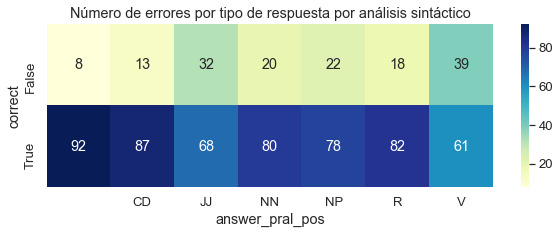

In [332]:
COLUMN_PIVOT = 'answer_pral_pos'
COLUMN_CORRECT = 'correct'#_'+model

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
new_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index().pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='id')
plt.figure(figsize=(10,3))

prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores por tipo de respuesta por análisis sintáctico")

In [336]:
new_df.loc[(new_df['answer_pral_pos']=='V')&(new_df['correct']==False), 'answer']

200                                              bounding
217                                               reduces
221                              multiplying two integers
274                             foundations were laid out
376                                                varied
                              ...                        
5719    outlined the division and administration of th...
5780                      Associating forces with vectors
5794                                        applied force
5812                                            quantized
5904                toward the center of the curving path
Name: answer, Length: 133, dtype: object

In [328]:
COLUMN_PIVOT = 'query_trigrams_pos'
new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')

prev_pivot = new_df[['id','correct', COLUMN_PIVOT]].groupby(['correct', COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot['correct'] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot['correct'] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot['correct'] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot['correct'] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot['correct'] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot['correct'] == False) 
                                         & (prev_pivot['id'] > 9) & (prev_pivot['porc'] > 5), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

new_filter_ids = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes), COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(new_filter_ids)]
new_pivot = prev_pivot.pivot(index='correct', columns=COLUMN_PIVOT, values='porc')

23


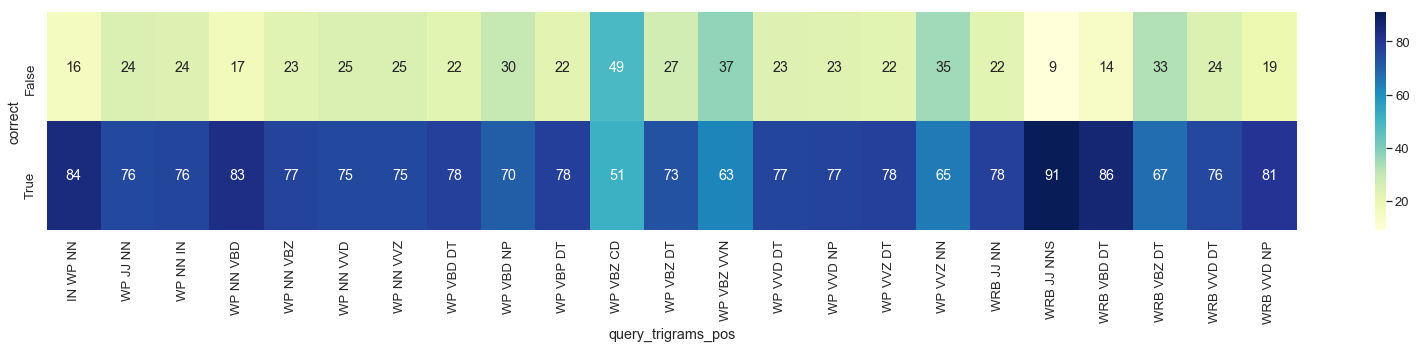

In [329]:
sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
#sns_heatmap.set_title("Error porcentual " + model + "sobre SQuAD train")

#### Agregar preguntas por patrones NER, sintaxis

17


Text(0.5, 1.0, 'Número de errores por tipo de entidad de respuesta SQuAD train')

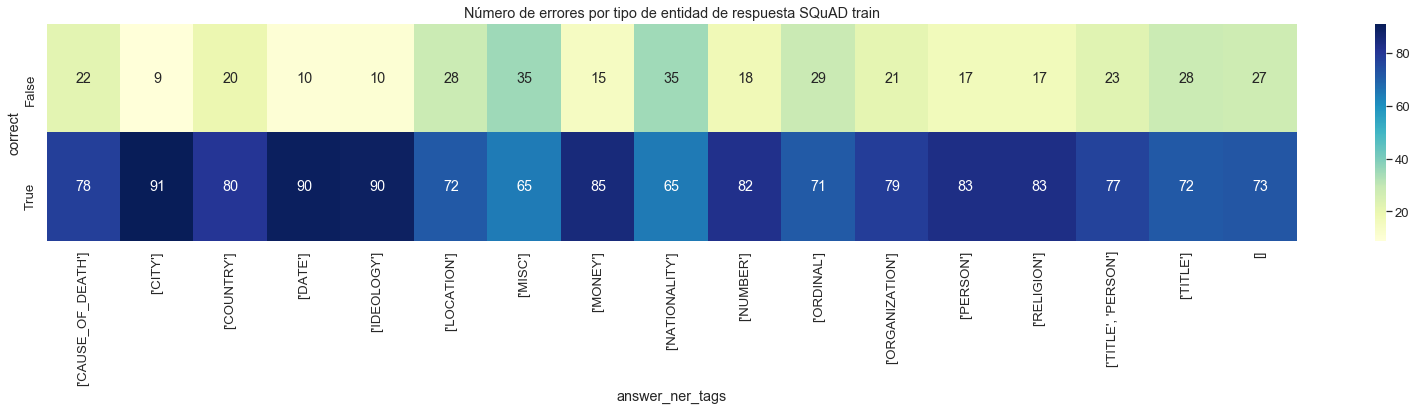

In [350]:
COLUMN_PIVOT = 'answer_ner_tags'
COLUMN_CORRECT = 'correct'#_'+model
MIN_PREGUNTAS = 5
MIN_PORC_ERROR = 0

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores por tipo de entidad de respuesta SQuAD train")

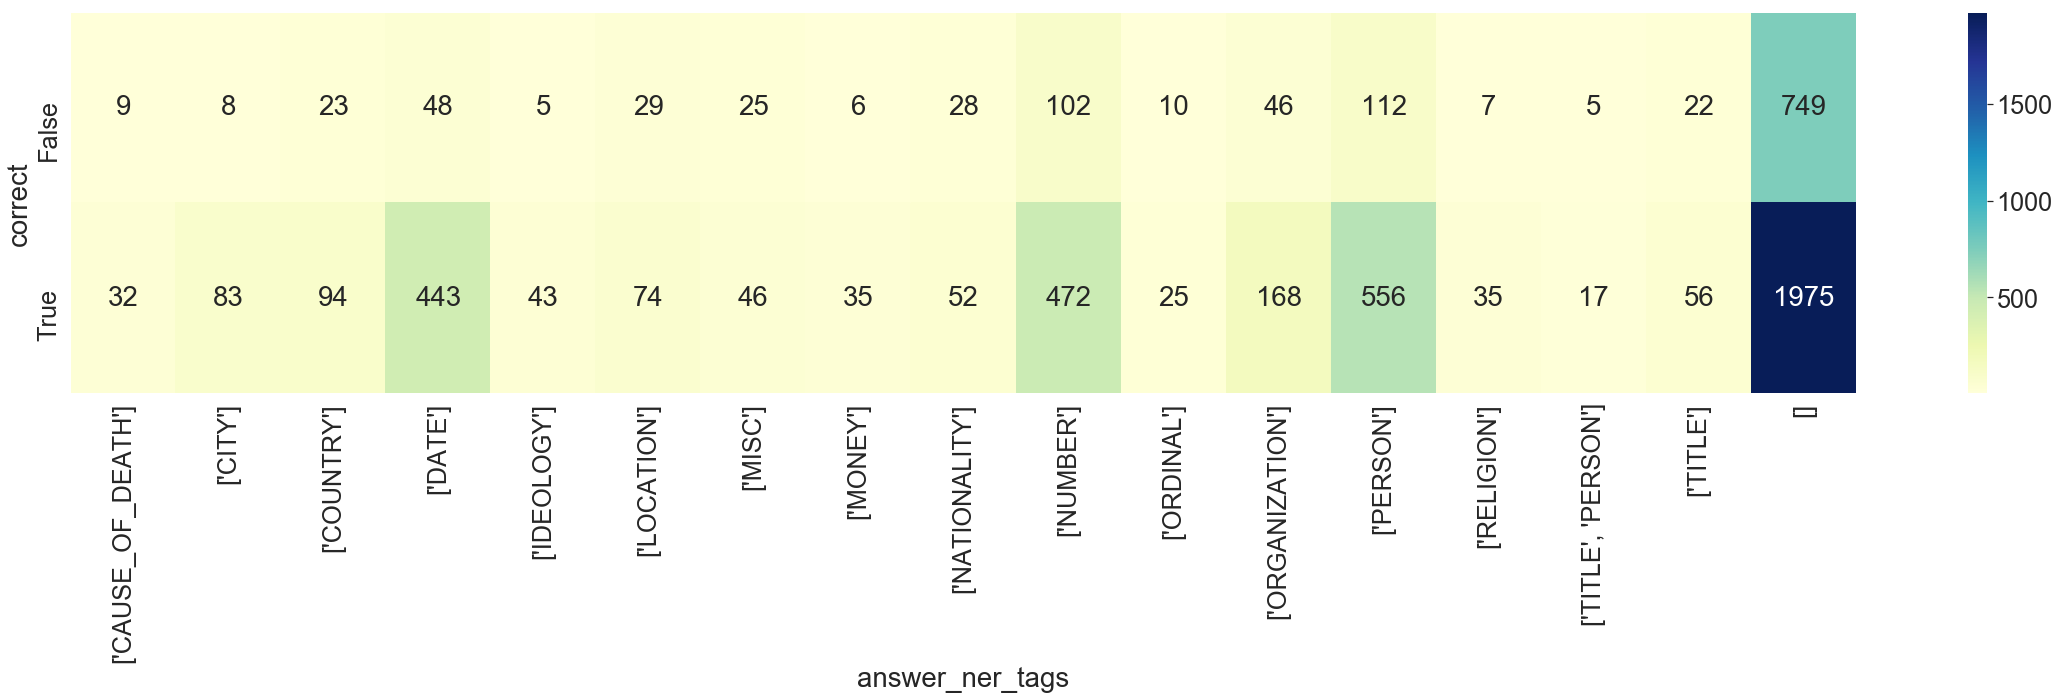

In [338]:
sns.set(font_scale=2.3)
plt.figure(figsize=(40,7))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
#sns_heatmap.set_title("Error porcentual " + model + "sobre SQuAD train")

c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
c:\users\larao_000\appdata\local\programs\python\python37\lib\site-packa

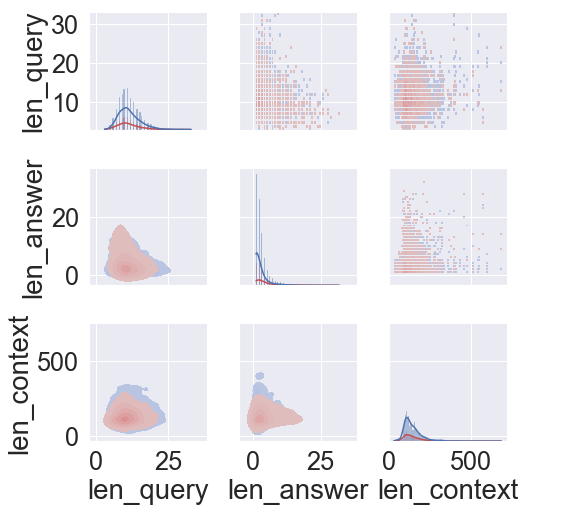

In [304]:
palette ={True: "b", False: "r"}
g = sns.PairGrid(new_df[['len_query', 'len_answer', 'len_context', 'correct']], hue='correct', palette=palette, hue_order=[True, False])
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

21


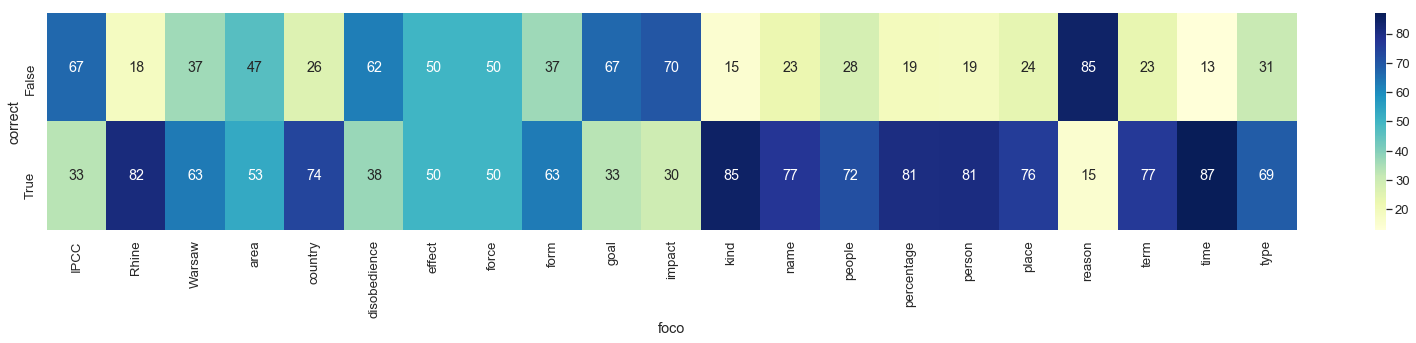

In [331]:
COLUMN_PIVOT = 'foco'
COLUMN_CORRECT = 'correct'#_'+model
MIN_PREGUNTAS = 7
MIN_PORC_ERROR = 7

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
#sns_heatmap.set_title("Número de errores por tipo de foco SQuAD train")

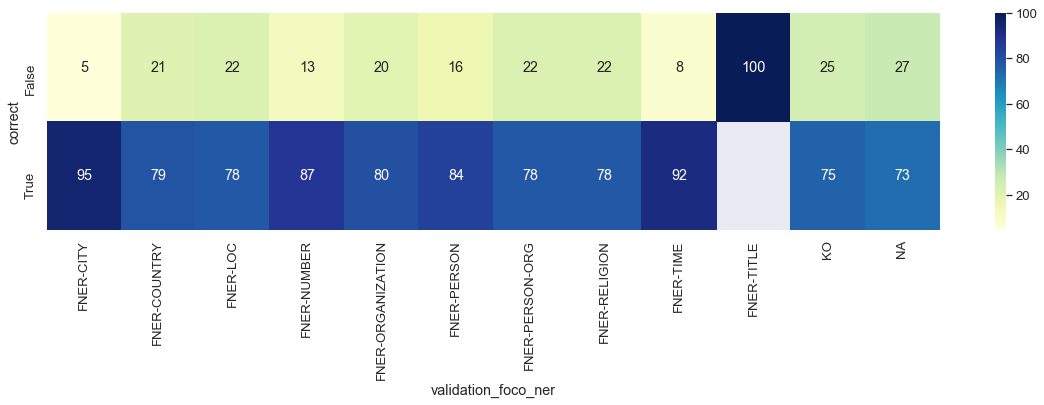

In [355]:
COLUMN_PIVOT = 'validation_foco_ner'
COLUMN_CORRECT = 'correct'#_'+model

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].apply(lambda x: x.replace('OK-','FNER-'))
new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')

prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')
plt.figure(figsize=(20,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
# annot=annot_pivot(new_pivot)
#sns_heatmap.set_title("Error " + model)

14


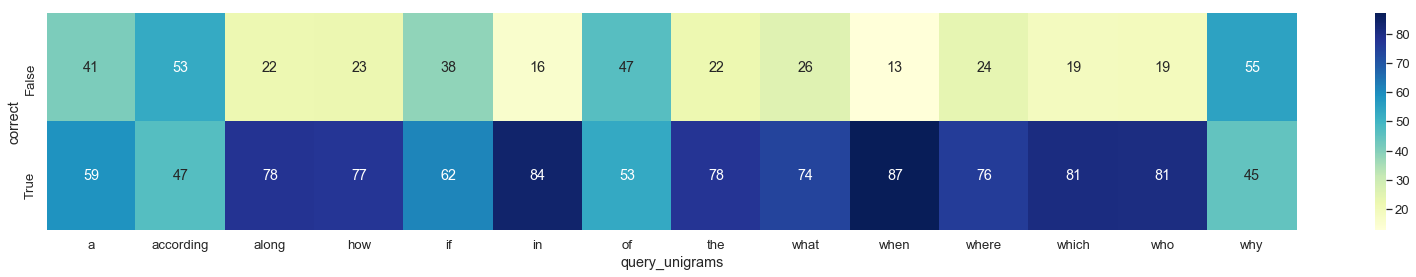

In [327]:
COLUMN_PIVOT = 'query_unigrams'
COLUMN_CORRECT = 'correct' #_'+model
MIN_PREGUNTAS = 7
MIN_PORC_ERROR = 7

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].apply(lambda x: x.lower())
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
#sns_heatmap.set_title("Número de errores " + model + "sobre SQuAD dev")

16


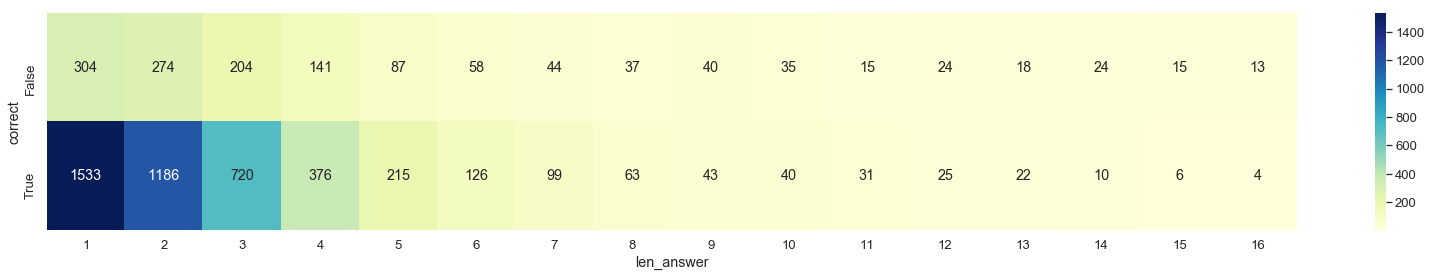

In [314]:
COLUMN_PIVOT = 'len_answer'
COLUMN_CORRECT = 'correct' #_'+model
MIN_PREGUNTAS = 10
MIN_PORC_ERROR = 3

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='id')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
#sns_heatmap.set_title("Error porcentual " + model + "sobre SQuAD train")
#sns_heatmap.set_title("Errores por longitud de respuesta SQuAD train")

20


Text(0.5, 1.0, 'Número de errores por longitud pregunta SQuAD dev')

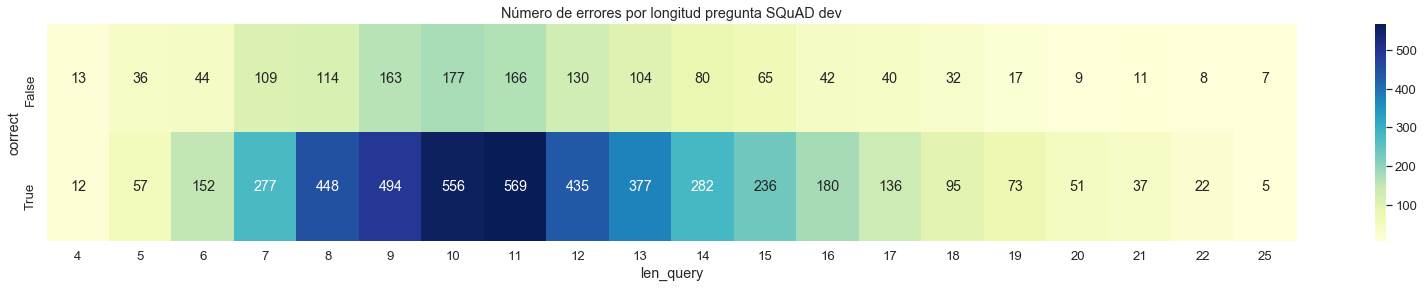

In [320]:
COLUMN_PIVOT = 'len_query'
COLUMN_CORRECT = 'correct' #_'+model
MIN_PREGUNTAS = 7
MIN_PORC_ERROR = 3

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='id')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores por longitud pregunta SQuAD dev") #+ model +

Text(0.5, 1.0, 'Número de errores por longitud pregunta SQuAD train')

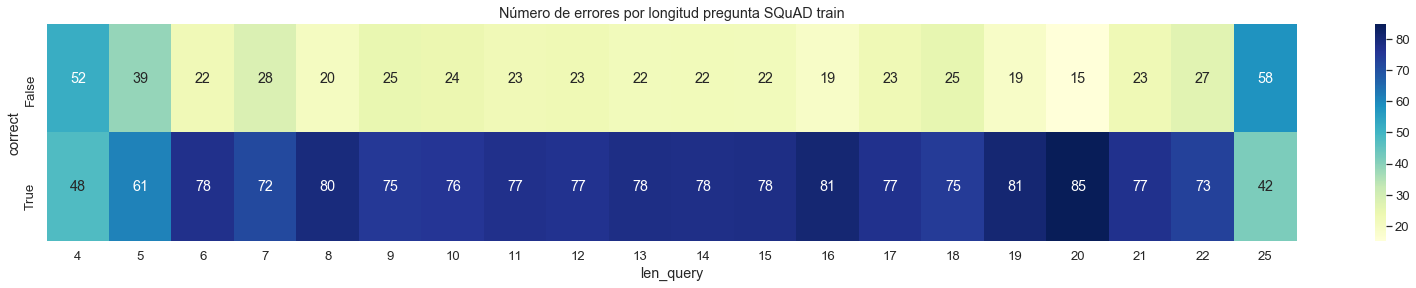

In [319]:
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
sns_heatmap.set_title("Número de errores por longitud pregunta SQuAD train")

19


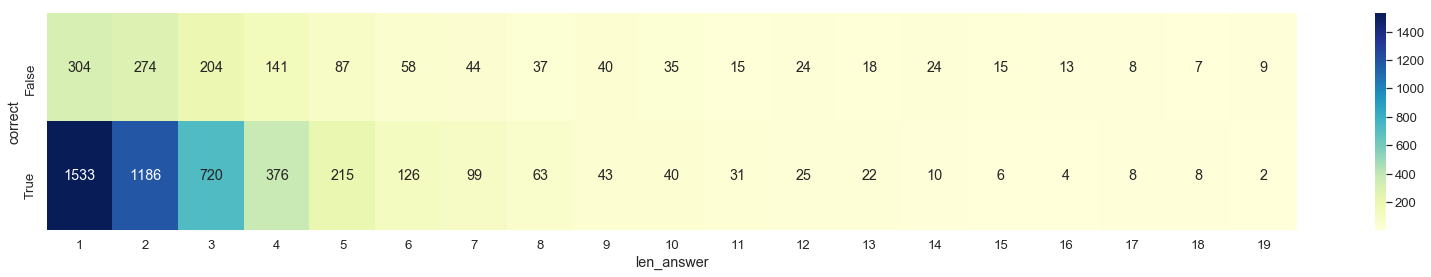

In [323]:
COLUMN_PIVOT = 'len_answer'
COLUMN_CORRECT = 'correct' #_'+model
MIN_PREGUNTAS = 7
MIN_PORC_ERROR = 3

new_df[COLUMN_PIVOT] = new_df[COLUMN_PIVOT].fillna('')
prev_pivot = new_df[['id',COLUMN_CORRECT, COLUMN_PIVOT]].groupby([COLUMN_CORRECT, COLUMN_PIVOT]).count().reset_index()
sum_pivot = new_df[['id', COLUMN_PIVOT]].groupby([COLUMN_PIVOT]).count().reset_index()
ids_con_errores = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False)&(prev_pivot['id'] > 0),COLUMN_PIVOT]
prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores)]
for ids_err in ids_con_errores:
    prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == False), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    try:
        prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'porc'] = 100*prev_pivot.loc[(prev_pivot[COLUMN_PIVOT] == ids_err)&(prev_pivot[COLUMN_CORRECT] == True), 'id'].values[0] / sum_pivot.loc[sum_pivot[COLUMN_PIVOT] == ids_err,'id'].values[0]
    except:
        pass

ids_con_errores_comunes = prev_pivot.loc[(prev_pivot[COLUMN_CORRECT] == False) 
                                         & (prev_pivot['id'] >= MIN_PREGUNTAS) & (prev_pivot['porc'] >= MIN_PORC_ERROR), COLUMN_PIVOT]
print(len(ids_con_errores_comunes))

prev_pivot = prev_pivot.loc[prev_pivot[COLUMN_PIVOT].isin(ids_con_errores_comunes)]
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='id')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
#sns_heatmap.set_title("Error porcentual " + model + "sobre SQuAD train")
#sns_heatmap.set_title("Errores por longitud de respuesta SQuAD train")

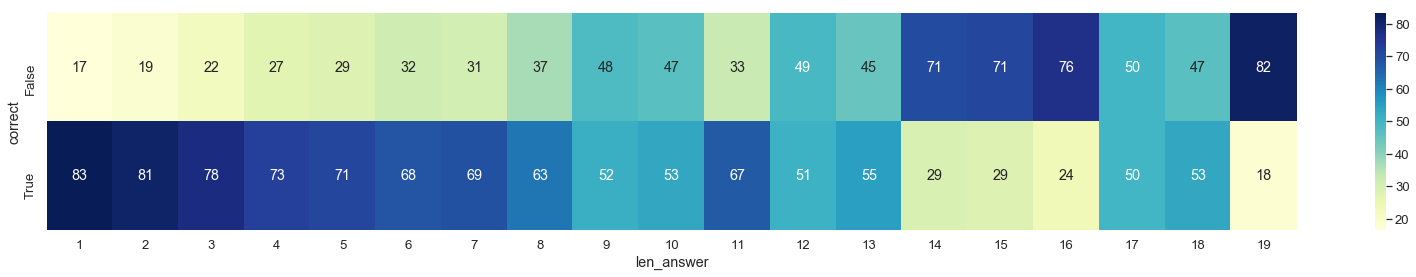

In [324]:
new_pivot = prev_pivot.pivot(index=COLUMN_CORRECT, columns=COLUMN_PIVOT, values='porc')

sns.set(font_scale=1.2)
plt.figure(figsize=(28,4))
sns_heatmap = sns.heatmap(new_pivot, cmap="YlGnBu", yticklabels=new_pivot.index, xticklabels=new_pivot.columns, annot=True, fmt=".0f")
#sns_heatmap.set_title("Error porcentual " + model + "sobre SQuAD train")
#sns_heatmap.set_title("Errores por longitud de respuesta SQuAD train")

In [420]:
#result = new_df[['id','query', 'score','query_cuatrigrams_pos', 'correct', 'impossible']].groupby(['query_cuatrigrams_pos', 'correct', 'impossible']).agg({'score': 'mean', 'query': 'count', 'id': ', '.join}).sort_values('score',ascending=False).reset_index()
result = new_df[['id','query', 'query_cuatrigrams_pos', 'correct', 'impossible']].groupby(['query_cuatrigrams_pos', 'correct', 'impossible']).agg({'query': 'count', 'id': ', '.join}).reset_index()

In [421]:
new_df['query_ner_tags'] = new_df['query_ner'].apply(lambda x: str(sorted(load_data_ner(x).keys())))
new_df['answer_ner_tags'] = new_df['answer_ner'].apply(lambda x: str(sorted(load_data_ner(x).keys())))

In [422]:
#result_ner = new_df[['id','query', 'score','query_ner_tags', 'correct', 'impossible']].groupby(['query_ner_tags', 'correct', 'impossible']).agg({'score': 'mean', 'query': 'count', 'id': ', '.join}).sort_values('score',ascending=False).reset_index()
result_ner = new_df[['id','query','query_ner_tags', 'correct', 'impossible']].groupby(['query_ner_tags', 'correct', 'impossible']).agg({'query': 'count', 'id': ', '.join}).reset_index()

In [423]:
#result_ner_pos = new_df[['id','query', 'score','query_ner_tags', 'query_cuatrigrams_pos', 'correct', 'impossible']].groupby(['query_ner_tags','query_cuatrigrams_pos','correct', 'impossible']).agg({'score': 'mean', 'query': 'count', 'id': ', '.join}).sort_values('score',ascending=False).reset_index()
result_ner_pos = new_df[['id','query','query_ner_tags', 'query_cuatrigrams_pos', 'correct', 'impossible']].groupby(['query_ner_tags','query_cuatrigrams_pos','correct', 'impossible']).agg({'query': 'count', 'id': ', '.join}).reset_index()

In [425]:
#result_foco = new_df[['id','query', 'score','foco', 'correct', 'impossible']].groupby(['foco','correct', 'impossible']).agg({'score': 'mean', 'query': 'count', 'id': ', '.join}).sort_values('score',ascending=False).reset_index()
result_foco = new_df[['id','query', 'foco', 'correct', 'impossible']].groupby(['foco','correct', 'impossible']).agg({'query': 'count', 'id': ', '.join}).reset_index()

In [426]:
#result_ner_foco = new_df[['id','query', 'score','foco','answer_ner_tags', 'correct', 'impossible']].groupby(['foco','answer_ner_tags','correct', 'impossible']).agg({'score': 'mean', 'query': 'count', 'id': ', '.join}).sort_values('score',ascending=False).reset_index()
result_ner_foco = new_df[['id','query', 'foco','answer_ner_tags', 'correct', 'impossible']].groupby(['foco','answer_ner_tags','correct', 'impossible']).agg({'query': 'count', 'id': ', '.join}).reset_index()

#### Para inspeccion de Casos con error

In [427]:
error_ids = str(list(result_ner_pos.loc[(
                                 (result_ner_pos['correct'] == False) 
                                 & (result_ner_pos['impossible'] == False)
                                )
                                , 'id'].values)).replace('[', '').replace(']', '').replace("'",'').replace('\\n','').split(', ')
print(len(error_ids))
#print(error_ids)

692


In [428]:
errors = new_df.loc[new_df['id'].isin(error_ids), ['id','query', 'context', 'answer', 'answer_model', 'query_ner', 'query_cuatrigrams_pos', 'context_ner']]

In [356]:
import plotly.express as px
import plotly.figure_factory as ff

#fig = px.histogram(new_df, x="score_phiyodr/bert-base-finetuned-squad2", color="correct")
fig = ff.create_distplot([new_df['score_phiyodr/bert-base-finetuned-squad2'].fillna(0),
                                 new_df['score_phiyodr/bert-large-finetuned-squad2'].fillna(0),
                                 new_df['score_deepset/roberta-base-squad2'].fillna(0),
                                 new_df['score_phiyodr/roberta-large-finetuned-squad2'].fillna(0)]
                                , ['phiyodr/bert-base-finetuned-squad2',
                                     'phiyodr/bert-large-finetuned-squad2',
                                     'deepset/roberta-base-squad2',
                                     'phiyodr/roberta-large-finetuned-squad2'], show_rug=False, show_hist=False)
fig.show()

In [357]:
error_df = new_df.loc[new_df['correct']==False]

fig = ff.create_distplot([error_df['score_phiyodr/bert-base-finetuned-squad2'].fillna(0),
                                 error_df['score_phiyodr/bert-large-finetuned-squad2'].fillna(0),
                                 error_df['score_deepset/roberta-base-squad2'].fillna(0),
                                 error_df['score_phiyodr/roberta-large-finetuned-squad2'].fillna(0)]
                                , ['error_score_phiyodr/bert-base-finetuned-squad2',
                                     'error_score_phiyodr/bert-large-finetuned-squad2',
                                     'error_score_deepset/roberta-base-squad2',
                                     'error_score_phiyodr/roberta-large-finetuned-squad2'], show_rug=False, show_hist=False)
fig.show()

In [358]:
pd.DataFrame({'score_phiyodr/bert-base-finetuned-squad2': error_df['score_phiyodr/bert-base-finetuned-squad2'],
               'score_phiyodr/bert-large-finetuned-squad2': error_df['score_phiyodr/bert-large-finetuned-squad2'],
                'score_deepset/roberta-base-squad2': error_df['score_deepset/roberta-base-squad2'],
                'score_phiyodr/roberta-large-finetuned-squad2': error_df['score_phiyodr/roberta-large-finetuned-squad2']}).describe()

score_phiyodr/bert-base-finetuned-squad2  \
count                               1390.000000   
mean                                   0.297897   
std                                    0.265079   
min                                    0.000000   
25%                                    0.064855   
50%                                    0.226445   
75%                                    0.475520   
max                                    0.997850   

       score_phiyodr/bert-large-finetuned-squad2  \
count                                1390.000000   
mean                                    0.410879   
std                                     0.314009   
min                                     0.000000   
25%                                     0.118002   
50%                                     0.381840   
75%                                     0.658640   
max                                     0.999340   

       score_deepset/roberta-base-squad2  \
count                        1390.000000   
mean                            0.374613   
std                             0.247060   
min                             0.000620   
25%                             0.169480   
50%                             0.336450   
75%                             0.537567   
max                             0.994130   

       score_phiyodr/roberta-large-finetuned-squad2  
count                                   1390.000000  
mean                                       0.513476  
std                                        0.305922  
min                                        0.000480  
25%                                        0.253003  
50%                                        0.488145  
75%                                        0.790833  
max                                        0.999670

In [359]:
squad_dev['num_common_terms'] = squad_dev.apply(lambda x: len(set(get_word_pos(x['query_pos'].lower())).intersection(set(get_word_pos(x['context_pos'].lower())))), axis=1)

In [360]:
squad_dev = squad_dev.merge(new_df[['id', 'correct']], how='left', on='id')

In [361]:
squad_dev['correct'].value_counts()

True     4538
False    1390
Name: correct, dtype: int64

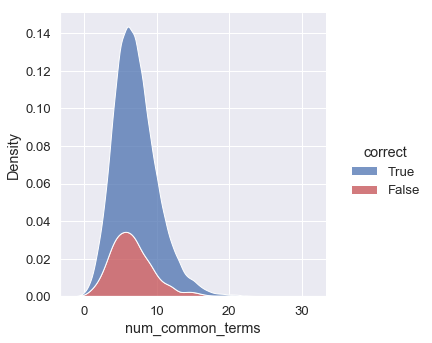

In [362]:
sns.displot(squad_dev, x="num_common_terms", hue="correct", kind="kde",multiple="stack", palette=palette, hue_order=[True, False])

In [363]:
squad_dev['num_common_terms'].describe()

count    11873.000000
mean         6.767287
std          2.933391
min          0.000000
25%          5.000000
50%          6.000000
75%          8.000000
max         30.000000
Name: num_common_terms, dtype: float64

#### Agregar preguntas por errores y ver relación con patrones NER, sintaxis

OJO analizo las que son contestables!!!

In [429]:
new_df_possible = new_df.loc[new_df['impossible'] == False]
#new_df_possible = new_df

In [430]:
new_df_group = new_df_possible.groupby(['query_cuatrigrams_pos', 'correct']).agg({'id': 'count'})
result_pos_group = new_df_group.reset_index()
result_pos_group = result_pos_group.loc[result_pos_group['correct']==False]
result_pos_group = result_pos_group[['query_cuatrigrams_pos', 'id']]
result_pos_group['err'] = result_pos_group['id']

In [431]:
for element in list(set(result_pos_group['query_cuatrigrams_pos'].values)):
    result_pos_group.loc[result_pos_group['query_cuatrigrams_pos']==element, 'id'] = len(new_df_possible.loc[new_df_possible['query_cuatrigrams_pos'] == element])

In [432]:
result_pos_group['err_percent'] = 100*result_pos_group['err'] / result_pos_group['id']

In [433]:
ner_column = 'query_ner_tags'
new_df_group = new_df_possible.groupby([ner_column, 'correct']).agg({'id': 'count'})
result_ner_q_group = new_df_group.reset_index()
result_ner_q_group = result_ner_q_group.loc[result_ner_q_group['correct']==False]
result_ner_q_group = result_ner_q_group[[ner_column, 'id']]
result_ner_q_group['err'] = result_ner_q_group['id']

In [434]:
for element in list(set(result_ner_q_group[ner_column].values)):
    result_ner_q_group.loc[result_ner_q_group[ner_column]==element, 'id'] = len(new_df_possible.loc[new_df_possible[ner_column] == element])

In [435]:
result_ner_q_group['err_percent'] = 100*result_ner_q_group['err'] / result_ner_q_group['id']

In [436]:
ner_column = 'answer_ner_tags'
new_df_group = new_df_possible.groupby([ner_column, 'correct']).agg({'id': 'count'})
result_ner_a_group = new_df_group.reset_index()
result_ner_a_group = result_ner_a_group.loc[result_ner_a_group['correct']==False]
result_ner_a_group = result_ner_a_group[[ner_column, 'id']]
result_ner_a_group['err'] = result_ner_a_group['id']

In [437]:
for element in list(set(result_ner_a_group[ner_column].values)):
    result_ner_a_group.loc[result_ner_a_group[ner_column]==element, 'id'] = len(new_df_possible.loc[new_df_possible[ner_column] == element])

In [438]:
result_ner_a_group['err_percent'] = 100*result_ner_a_group['err'] / result_ner_a_group['id']

In [439]:
ner_column = 'answer_ner_tags'
new_df_group = new_df_possible.groupby(['foco', ner_column, 'correct']).agg({'id': 'count'})
result_ner_foco_group = new_df_group.reset_index()
result_ner_foco_group = result_ner_foco_group.loc[result_ner_foco_group['correct']==False]
result_ner_foco_group = result_ner_foco_group[['foco', ner_column, 'id']]
result_ner_foco_group['err'] = result_ner_foco_group['id']

In [440]:
new_df_possible = new_df_possible.reset_index()

In [441]:
for element in list(set(result_ner_foco_group[ner_column].values)):
    for foco in list(set(result_ner_foco_group['foco'].values)):
        result_ner_foco_group.loc[(result_ner_foco_group[ner_column]==element) & (result_ner_foco_group['foco']==foco), 
                                  'id'] = len(new_df_possible.loc[(new_df_possible[ner_column]==element) & (new_df_possible['foco']==foco)])

In [442]:
result_ner_foco_group['err_percent'] = 100*result_ner_foco_group['err'] / result_ner_foco_group['id']

In [443]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('analysis//'+model.replace('/','-')+'.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
new_df.to_excel(writer, sheet_name='model_results', index=False)
result.to_excel(writer, sheet_name='agg_pos', index=False)
result_ner.to_excel(writer, sheet_name='agg_ner', index=False)
result_ner_pos.to_excel(writer, sheet_name='agg_ner_pos', index=False)
result_foco.to_excel(writer, sheet_name='agg_foco', index=False)
result_ner_foco.to_excel(writer, sheet_name='agg_foco_ner_answer', index=False)

errors.to_excel(writer, sheet_name='errors', index=False)

result_pos_group.to_excel(writer, sheet_name='err_pos', index=False)
result_ner_q_group.to_excel(writer, sheet_name='err_ner_query', index=False)
result_ner_a_group.to_excel(writer, sheet_name='err_ner_answer', index=False)
result_ner_foco_group.to_excel(writer, sheet_name='err_foco_ner_answer', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.save()

#### Obtencion de distribucion de confianza

In [399]:
model

'phiyodr/bert-base-finetuned-squad2'

In [398]:
fig = px.histogram(new_df, x="score", color="correct", nbins=10)
fig.show()

#### Inspeccion de errores por tipo o general

In [813]:
#result_pos.loc[result_pos['query_cuatrigrams_pos'] == 'WP VBZ DT NN']

In [164]:
cause_of_death_ids = str(result_ner.loc[((result_ner['query_ner_tags'] == str(['CAUSE_OF_DEATH']))
                                 & (result_ner['correct'] == False) 
                                 & (result_ner['impossible'] == False)
                                )
                                , 'id'].values).replace('[', '').replace(']', '').replace("'",'').split(', ')

In [166]:
new_df.loc[new_df['id'].isin(cause_of_death_ids), ['query', 'foco', 'answer', 'answer_model']]

query         foco  \
1316  What device is used to treat various condition...       device   
1377  What other sources of high oxidative potential...      sources   
1407  How many times more did the other nations have...        times   
1784          For how long did the plague stick around?       plague   
1790    What does it mean for a disease to be enzootic?      disease   
1791  How old are the gravestones that reference the...  gravestones   
1827  Which country was the last to receive the dise...      country   
1861  What is the newer, more widely accepted theory...       theory   
1864  Where and when did the investigation of the pl...        place   
1876  What is another plague thought to have spread ...       plague   
1886  What skin-related symptom appears from the pne...      appears   
1912  What do the strains of y. pestis suggest abut ...      strains   
1928  Why are researchers struggling to identify the...  researchers   
1929  How much do estimations of the population duri...  estimations   
1936  Why might rats not be responsible for the plague?         rats   
1937  How significant was the transfer of disease th...     transfer   
1938  Why  might the temperature affect the theory o...  temperature   
1939  Was the bubonic plague spread faster or slower...       plague   
1944                               What is septicemia?    septicemia   
1954  How many people would die of plague in largely...       people   
1982                 When was the last plague outbreak?         time   
2206  Why was it thought that  ctenophores were a po...         that   
4172  Lots of tumor cells have fewer of what type of...          NaN   
4355  What is the virus in humans that causes cervic...        virus   
5044  When had the Brotherhood renounced violence as...         time   
5558                              Where was war fought?        place   
5559                                 How did war start?          war   
5560                    When did violence start in war?         time   

                                                 answer  \
1316                Hyperbaric (high-pressure) medicine   
1377                                compounds of oxygen   
1407                                     ten times more   
1784                             until the 19th century   
1790                                   commonly present   
1791                                  dating to 1338–39   
1827                                northwestern Russia   
1861              That the plague was caused by bad air   
1864                                  Hong Kong in 1894   
1876  the Justinian plague that was prevalent in the...   
1886                                purple skin patches   
1912    the plague may have entered Europe in two waves   
1928   the lack of reliable statistics from this period   
1929                                       by over 100%   
1936                the rat population was insufficient   
1937                           of marginal significance   
1938  temperatures that are too cold in northern Eur...   
1939  the Black Death was much faster than that of m...   
1944                       (a type of "blood poisoning"   
1954                                     as much as 50%   
1982     The last plague outbreak ravaged Oslo in 1654.   
2206  their low ratio of organic matter to salt and ...   
4172                              MHC class I molecules   
4355                               human papillomavirus   
5044                                       By the 1970s   
5558  primarily along the frontiers between New Fran...   
5559  dispute over control of the confluence of the ...   
5560             Battle of Jumonville Glen in May 1754,   

                                           answer_model  
1316  {'score': 0.44905194640159607, 'start': 41, 'e...  
1377  {'score': 0.007457601372152567, 'start': 459, ...  
1407  {'score': 0.4642515778541565, 'start': 766, 'e...  
1784  {'score': 0